In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.data',header = None, names = col_names)

In [4]:
# Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
    
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Check Class Imbalance
df['income'].value_counts(normalize = True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [6]:
# Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first = True)

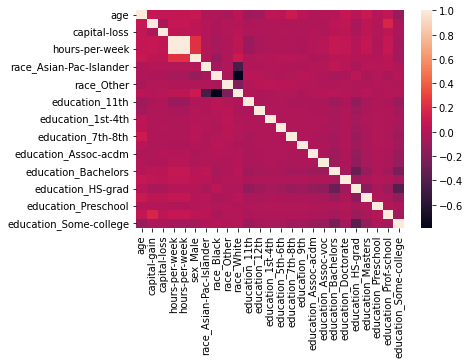

In [7]:
# Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())
plt.show()
plt.close()

In [8]:
# Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df.income == '<=50K', 0, 1)

In [9]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [10]:
# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [16]:
# Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-5.51915982301951
Model Parameters, Coeff:
[[ 3.63389414e-02  3.14494064e-04  6.65914800e-04  1.40674229e-02
   1.76065553e-02  1.02507791e+00  0.00000000e+00 -3.79914026e-01
   0.00000000e+00  5.72004759e-02 -5.81606268e-01  0.00000000e+00
   0.00000000e+00 -4.05657965e-01 -8.97295740e-01 -5.01949298e-01
   5.66145015e-01  5.41549719e-01  1.27557636e+00  1.79333005e+00
   0.00000000e+00  1.59363424e+00  0.00000000e+00  1.81786273e+00
   3.78749609e-01]]


In [17]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on test set: {log_reg.score(x_test, y_test)}')

Confusion Matrix on test set:
[[4781  245]
 [ 879  608]]
Accuracy Score on test set: 0.8274220789190849


In [23]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns = ['var', 'coef']).sort_values('coef')

coef_df = coef_df[coef_df['coef'].abs() > 0]

coef_df.head()

,var,coef
14,education_7th-8th,-0.897296
10,education_11th,-0.581606
15,education_9th,-0.501949
13,education_5th-6th,-0.405658
7,race_Black,-0.379914


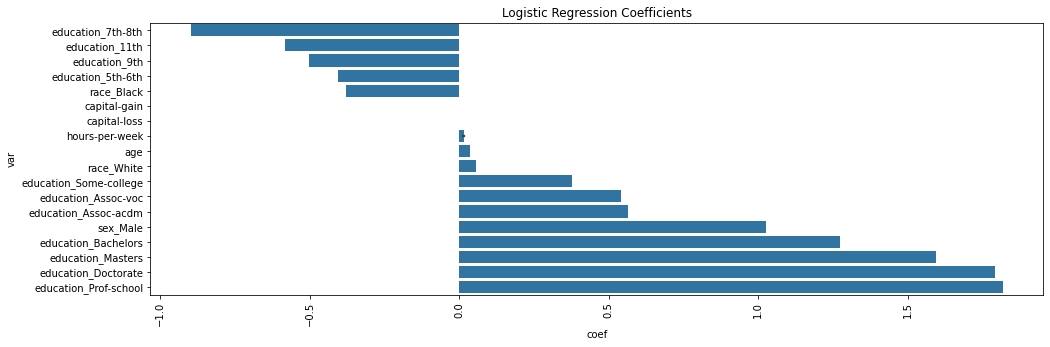

In [21]:
# barplot of the coefficients sorted in ascending order
plt.figure(figsize = (16, 5))
sns.barplot(x = 'coef', y = 'var', data = coef_df)
plt.xticks(rotation = 90)
plt.title('Logistic Regression Coefficients')
plt.show()

ROC AUC Score: 0.8455


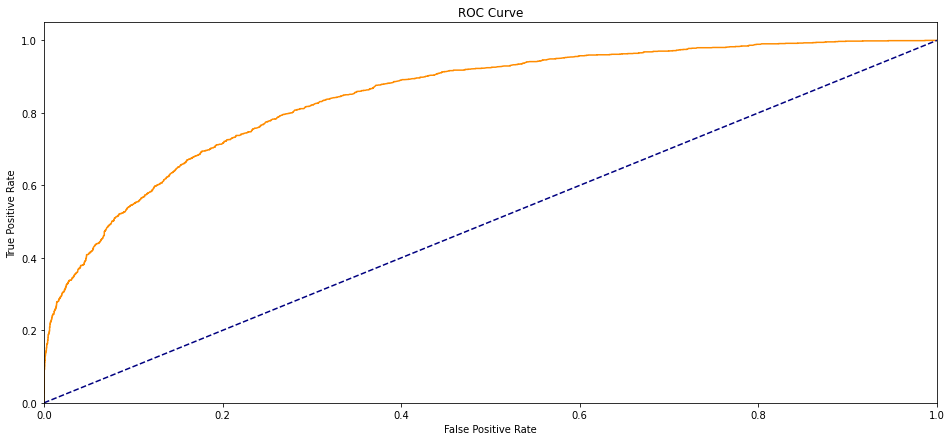

In [30]:
# Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)

roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:, 1])

plt.figure(figsize = (16, 7))
plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()